# Empathy Prediction

## Dataset :

The dataset used is the Young People Dataset taken from Kaggle : https://www.kaggle.com/miroslavsabo/young-people-survey. The dataset was created as a result of survey conducted by the students of a Statistics class that explores the preferences, interests, habits, opinions, and fears of young people. It has 1010 rows and 150 columns. The columns are split into the following groups :

- Music preferences (19 items)
- Movie preferences (12 items)
- Hobbies & interests (32 items)
- Phobias (10 items)
- Health habits (3 items)
- Personality traits, views on life, & opinions (57 items)
- Spending habits (7 items)
- Demographics (10 items)

The following block loads the dataset as a DataFrame using Pandas and displays the first 10 rows of it.

In [1]:
import pandas as pd
df=pd.read_csv("young-people-survey/responses.csv")

In [2]:
df.head(10)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,...,20.0,177.0,50.0,1.0,female,right handed,secondary school,no,village,house/bungalow
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,19.0,184.0,90.0,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow
8,5.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,...,18.0,166.0,55.0,1.0,female,right handed,secondary school,no,city,house/bungalow
9,5.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,...,19.0,174.0,60.0,3.0,female,right handed,secondary school,no,city,block of flats


## Preprocessing and Feature Engineering

The continuous variables Height and Weight can be combined into a single variable called BMI. BMI would encode the information of both height and weight and hence tends to be more informative than the two separate columns. Thus the Height and Weight columns are dropped and the BMI column is added to the data. BMI is calculated using the following relation : Weight / (Height/100)^2

In [3]:
htwt=list(zip(df['Height'],df['Weight']))
bmi=[]
for h,w in htwt:
    temp=(w/((h/100)*(h/100)))
    bmi.append(temp)

Displaying the calculated BMI :

In [4]:
bmi

[18.06616733787497,
 21.829952199932254,
 21.62964876033058,
 19.94321254732288,
 20.41522491349481,
 22.25690831309978,
 15.959653994701394,
 26.583175803402646,
 19.959355494266223,
 19.817677368212443,
 19.591836734693878,
 19.369834710743802,
 19.48696145124717,
 20.202020202020204,
 18.612244897959183,
 24.577867151840145,
 21.224489795918366,
 23.030045351473927,
 23.808797045267237,
 25.46401086464464,
 22.25690831309978,
 24.56931437160365,
 25.099501595611173,
 19.13265306122449,
 18.286779733945284,
 19.377162629757787,
 23.140495867768596,
 18.818924310286427,
 22.877405702193368,
 21.258503401360546,
 25.97867956642479,
 25.53544639152223,
 18.426534209261334,
 24.221453287197235,
 21.38593635289987,
 24.913494809688583,
 21.71806608974573,
 29.510591672753833,
 21.258503401360546,
 19.14672216441207,
 20.9572742022715,
 22.634676324128566,
 31.14186851211073,
 20.70081674131507,
 23.18339100346021,
 23.808797045267237,
 20.70081674131507,
 20.761245674740486,
 23.938989774

Height and Weight columns are dropped from the original Dataframe and BMI column is added to it :

In [5]:
Data=df.drop(['Height','Weight'],axis=1)
Data['bmi']=bmi

Displaying 5 rows of the new Dataframe with the added BMI column :

In [6]:
Data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Age,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,bmi
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,20.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,18.066167
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,19.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,21.829952
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,2.0,20.0,2.0,female,right handed,secondary school,no,city,block of flats,21.629649
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,22.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,19.943213
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,4.0,20.0,1.0,female,right handed,secondary school,no,village,house/bungalow,20.415225


It is seen from the DataFrame that some of the variables or columns have string categorical values like Gender, Education and so on. Let us get a list of all the categorical columns :

In [7]:
cols=list(df.select_dtypes(include=['object']).columns)

In [8]:
cols

['Smoking',
 'Alcohol',
 'Punctuality',
 'Lying',
 'Internet usage',
 'Gender',
 'Left - right handed',
 'Education',
 'Only child',
 'Village - town',
 'House - block of flats']

The unique categories in each of these columns can be found as follows (the nans can bbe ignored, they will be removed eventually) :

In [22]:
Data['Smoking'].unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [23]:
Data['Alcohol'].unique()

array(['drink a lot', 'social drinker', 'never', nan], dtype=object)

In [24]:
Data['Punctuality'].unique()

array(['i am always on time', 'i am often early',
       'i am often running late', nan], dtype=object)

In [25]:
Data['Lying'].unique()

array(['never', 'sometimes', 'only to avoid hurting someone',
       'everytime it suits me', nan], dtype=object)

In [26]:
Data['Internet usage'].unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

In [27]:
Data['Gender'].unique()

array(['female', 'male', nan], dtype=object)

In [28]:
Data['Left - right handed'].unique()

array(['right handed', 'left handed', nan], dtype=object)

In [29]:
Data['Education'].unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil', nan], dtype=object)

In [30]:
Data['Only child'].unique()

array(['no', 'yes', nan], dtype=object)

In [31]:
Data['Village - town'].unique()

array(['village', 'city', nan], dtype=object)

In [32]:
Data['House - block of flats'].unique()

array(['block of flats', 'house/bungalow', nan], dtype=object)

These string categories have to be converted to their numerical equivalent. There are many ways to do the same. One particular method is to take all the unique values of each column and put them as separate columns in the DataFrame so that these new columns can take a value of 1 or 0 depending on whether the category is present for a particular row or not. 

Pandas has a function called get_dummies that serves the above mentioned purpose. Applying this function to a categorical variable or column gives the following results (displaying 5 rows):

In [33]:
pd.get_dummies(Data['Smoking']).head()

,current smoker,former smoker,never smoked,tried smoking
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1


In [34]:
pd.get_dummies(Data['Alcohol']).head()

,drink a lot,never,social drinker
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


This is also called as one-hot representation of the variable. Applying get_dummies() to the entire Dataframe will transform all the categorical variables to their one_hot representation .

In [35]:
Data=pd.get_dummies(Data)

In [36]:
Data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,0,0,0,0,1,0,0,1,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,0,0,0,0,1,0,1,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,0,0,0,1,1,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,1,1,0,0,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,0,0,0,1,1,0,0,1,0,1


Since this is a survey dataset, people tend to not fill out every field in the survey. Hence the dataset will contain a lot of missing values which will be encoded as nan's in the DataFrame. Let us find out which are the columns with nans :

In [37]:
nacolumns=Data.columns[Data.isnull().any()].tolist()

In [38]:
nacolumns

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Rats',
 'Ageing',
 'Dange

A lot of columns have missing values. There are several ways to deal with missing values. The most basic one is to drop the rows having missing values but this might lead to a loss of information. Other ways include filling it with mean of column for continuous variables, or meadian or mode of the column. One another way is to make use of machine learning to predict these missing values. I chose to go with MICE imputation method which I came across in the web : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/ . 

Fancyimpute is a package in python that assists with imputing the missing values. It has a function called MICE() to impute the missing values using Mice Method.

In [39]:
from fancyimpute import MICE
FullData=MICE().complete(Data)

/home/parinitha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[MICE] Completing matrix with shape (1010, 172)
[MICE] Starting imputation round 1/110, elapsed time 0.004
[MICE] Starting imputation round 2/110, elapsed time 0.841
[MICE] Starting imputation round 3/110, elapsed time 1.666
[MICE] Starting imputation round 4/110, elapsed time 2.022
[MICE] Starting imputation round 5/110, elapsed time 2.475
[MICE] Starting imputation round 6/110, elapsed time 2.954
[MICE] Starting imputation round 7/110, elapsed time 3.685
[MICE] Starting imputation round 8/110, elapsed time 5.409
[MICE] Starting imputation round 9/110, elapsed time 7.366
[MICE] Starting imputation round 10/110, elapsed time 9.144
[MICE] Starting imputation round 11/110, elapsed time 10.557
[MICE] Starting imputation round 12/110, elapsed time 11.012
[MICE] Starting imputation round 13/110, elapsed time 11.393
[MICE] Starting imputation round 14/110, elapsed time 11.872
[MICE] Starting imputation round 15/110, elapsed time 12.360
[MICE] Starting imputation round 16/110, elapsed time 12

Let's check if there are any missing value columns :

In [40]:
DataImputed=pd.DataFrame(FullData)
nacolumns=DataImputed.columns[DataImputed.isnull().any()].tolist()

In [41]:
nacolumns

[]

The missing values have all been filled out!!

## Machine Learning Task  

The chosen machine learning task is to predict how empathetic a person is from a scale of 1 to 5. This can taken as a multiclass classification problem where each level in the 5-point scale becomes a class. 

The target vaiable containing the empathy column is taken as Y and the rest of the columns together is taken as X where each column of X represents a predictor variable .

In [42]:
from numpy import *
index=list(Data.columns).index('Empathy')
Y=FullData[:,index]
X=concatenate((FullData[:,:index],FullData[:,index+1:]),axis=1)

Let us visualize the correlation between the target variable and predictor variables using a correlation matrix

In [43]:
corr=[]
columns=list(Data.columns)

Removing the target Empathy from list of columns :

In [44]:
columns.remove('Empathy')

In [45]:
for i in columns:
    corr.append(Data[i].corr(Data['Empathy']))

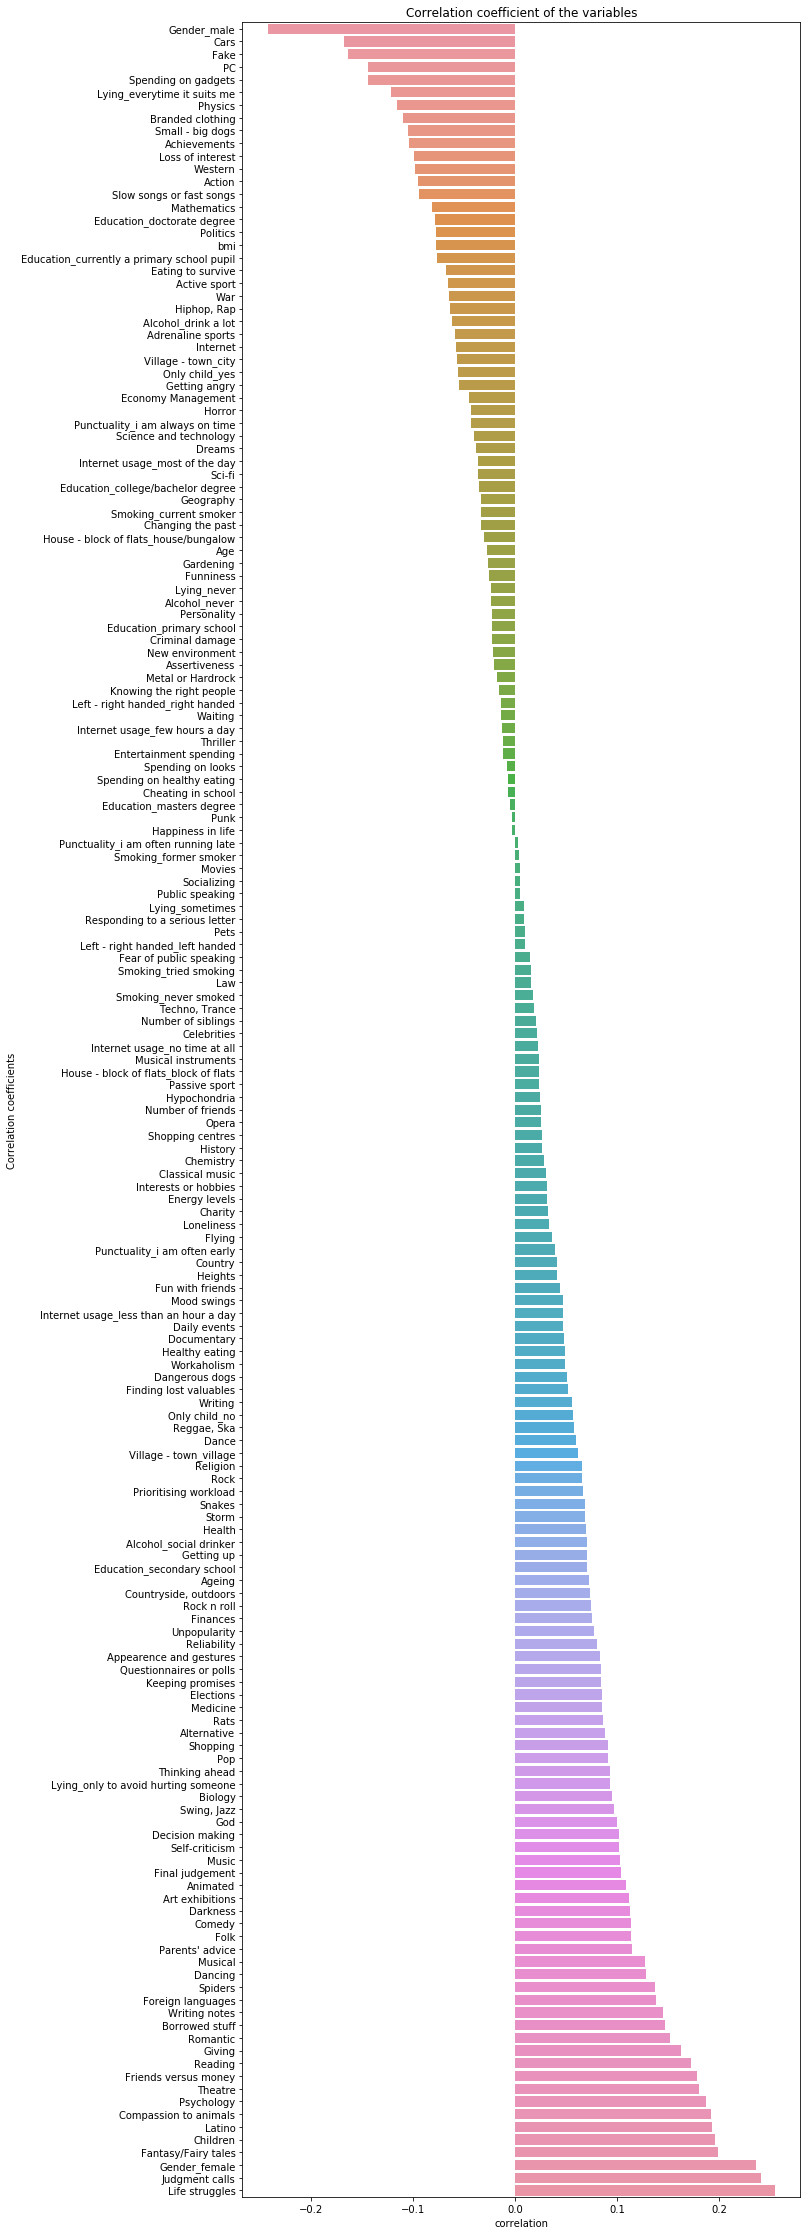

In [46]:
import seaborn as sb
import matplotlib.pyplot as py
Plot=pd.DataFrame({'variables':columns,'correlation':corr})
Plot=Plot.sort_values(by=['correlation'])
fig, ax = py.subplots(figsize= (10,40))
ax.set_title("Correlation coefficient of the variables")
sb.barplot(x=Plot['correlation'], y=Plot['variables'],  ax = ax)
ax.set_ylabel("Correlation coefficients")
py.show()

From the Plot, it is easy to visualize how different variables are correlated with Empathy. This however only captures the linear correlation. In order to select the variables that affect the target, LassoCV() from sklearn was used. Lasso is popular feature selection technique which tends to make the weights of unnecessary features go to zero.

In [51]:
from sklearn.linear_model import LassoCV
clf=LassoCV(cv=5)
clf.fit(X,Y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

The feature\_importances\_ attribute tells how much each variable impacts the target

In [52]:
clf.coef_

array([ 0.00000000e+00, -3.41248796e-02,  0.00000000e+00,  1.35000994e-02,
        0.00000000e+00, -2.95163348e-02,  0.00000000e+00,  1.70620165e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.78918946e-02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  4.14950511e-02,
        5.37992906e-02,  2.91470730e-02, -6.89353610e-03, -3.54485895e-02,
       -0.00000000e+00,  1.88911110e-02,  4.66808744e-02, -0.00000000e+00,
        2.48465397e-02,  1.47536219e-02,  4.03606448e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        7.16684973e-02, -2.95265306e-02, -3.67522418e-03, -3.29778264e-02,
       -0.00000000e+00, -2.90299762e-02, -2.43915625e-02,  0.00000000e+00,
        0.00000000e+00,  4.05764171e-02, -2.98330414e-02,  6.95795733e-03,
        0.00000000e+00,  0.00000000e+00, -3.85535435e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.13593439e-04, -1.76152983e-02,
       -0.00000000e+00,  

A threshold can be set on this feature\_importances\_ to select the top most important features. I chose a threshold of 0.008. The X matrix can then be modified based on this.

In [53]:
features=where(clf.coef_!=0)[0]
Xnew=X[:,features]

In [54]:
Xnew.shape

(1010, 68)

The huge number of features has now been reduced to 18!

## Setup

The given data is split into train and test sets in the ratio of 80:20. 80% of the data is considered to be the train set and the rest 20% is the test set.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnew, Y.astype(int), test_size=0.2, random_state = 42)

In [56]:
X_train.shape

(808, 68)

In [57]:
X_test.shape

(202, 68)

## Base Classifier

The classifier which learns the most frequent label from the training set and predicts the same for the test set is taken as the base classifier. The following code builds such a classifier :

In [58]:
counts=[]
counts.append(list(y_train).count(1))
counts.append(list(y_train).count(2))
counts.append(list(y_train).count(3))
counts.append(list(y_train).count(4))
counts.append(list(y_train).count(5))
most_frequent=counts.index(max(counts))+1

The classifier has been trained to learn the most frequent class as the label. This is now used to make predictions on the test set and accuracy is calculated :

In [59]:
preds=[most_frequent]*X_test.shape[0]
print("Accuracy of the base classifier is {0}".format(mean(y_test==array(preds))))

Accuracy of the base classifier is 0.32673267326732675


Our Task is to come up with a model that performs better than the base classifier

## Classification Models

Two classification models have been used to perform the task in hand namely, Kernel SVM and Gradient Boosting Classifier. Both of these are popular and knowm to do well in the classification domain. 

The following code trains a SVM without any parameter tuning on the given Data and is in turn used to make predictions on the test data to find its efficiency :

In [60]:
from sklearn.svm import SVC
m=SVC(kernel = 'rbf').fit(X_train,y_train)

In [61]:
m.score(X_test,y_test)

0.42574257425742573

Let us now tune the parameters of the SVM and check its performance. GridSearchCV is provided by sklearn to do this task. GridSearch over the range values of the parameter along with 5-Fold cross validation is used to find the optimal values of the hyper-parameters of the model.

In [62]:
from sklearn.model_selection import KFold,GridSearchCV
model1= SVC(kernel = 'rbf', gamma='auto')
param_grid={'C': arange(0.1,10,0.05),'kernel':['rbf'],'class_weight':['balanced', None]}
search = GridSearchCV(model1, param_grid=param_grid, cv=5)
search.fit(X_train, y_train)
print(search.best_params_)

{'C': 1.5000000000000004, 'class_weight': None, 'kernel': 'rbf'}


In [63]:
m=SVC(C=search.best_params_['C'],kernel = 'rbf', gamma='auto').fit(X_train,y_train)

In [64]:
m.score(X_test,y_test)

0.44554455445544555

The tuning of the parameters has lead to an increase in the test accuracy!

The following code trains a GradientBoostingClassifier without any parameter tuning on the given Data and is in turn used to make predictions on the test data to find its efficiency :

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
m=GradientBoostingClassifier(learning_rate=0.001)
m.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [89]:
m.score(X_test,y_test)

0.35148514851485146

Let us tune the parameters of the classifier one by one using GridSearchCV().

In [90]:
print("Tuning number of estimators...")
param_1 = {'n_estimators':arange(20,500,10)}
search1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10),param_grid = param_1, cv=5)
search1.fit(X_train,y_train)
estimators=search1.best_params_['n_estimators']
print(estimators)
print("Done tuning number of estimators")

Tuning number of estimators...
130
Done tuning number of estimators


In [91]:
print("Tuning max depth and min min_samples_split...")
param_2 = {'max_depth':list(range(5,50,2)), 'min_samples_split':list(range(200,1000,100))}
search2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=estimators, max_features='sqrt', subsample=0.8, random_state=10),param_grid = param_2,cv=5)
search2.fit(X_train,y_train)
print(search2.best_params_)
maxdepth=search2.best_params_['max_depth']
minsplit=search2.best_params_['min_samples_split']
print("Done Tuning max depth and min_samples_split")

Tuning max depth and min min_samples_split...
{'max_depth': 9, 'min_samples_split': 200}
Done Tuning max depth and min_samples_split


In [92]:
print("Tuning min_samples_split and min_samples_leaf...")
param_3 = {'min_samples_split':list(range(minsplit,2100,200)), 'min_samples_leaf':list(range(30,71,10))}
search3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=estimators,max_depth=maxdepth,max_features='sqrt', subsample=0.8, random_state=10),param_grid = param_3,cv=5)
search3.fit(X_train,y_train)
print(search3.best_params_)
minsplit=search3.best_params_['min_samples_split']
minleaf=search3.best_params_['min_samples_leaf']

Tuning min_samples_split and min_samples_leaf...
{'min_samples_leaf': 70, 'min_samples_split': 200}


In [93]:
print("Tuning max_features...")
param_4 = {'max_features':list(range(2,X_train.shape[1],2))}
search4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=estimators,max_depth=maxdepth, min_samples_split=minsplit, min_samples_leaf=minleaf, subsample=0.8, random_state=10),param_grid = param_4, cv=5)
search4.fit(X_train,y_train)
print(search4.best_params_)
maxfeat=search4.best_params_['max_features']

Tuning max_features...
{'max_features': 8}


In [94]:
print("Tuning subsample...")
param_5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
search5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=estimators,max_depth=maxdepth,min_samples_split=minsplit, min_samples_leaf=minleaf, subsample=0.8, random_state=10,max_features=maxfeat),param_grid = param_5, cv=5)
search5.fit(X_train,y_train)
print(search5.best_params_)
subsamp=search5.best_params_['subsample']

Tuning subsample...
{'subsample': 0.9}


In [95]:
from sklearn.model_selection import cross_val_score
print("Tuning the learning rate...")
scores=[]
tuned = GradientBoostingClassifier(learning_rate=0.05, n_estimators=estimators*2,max_depth=maxdepth, min_samples_split=minsplit,min_samples_leaf=minleaf, subsample=subsamp, random_state=10, max_features=maxfeat)
scores.append(mean(cross_val_score(tuned,X_train,y_train,cv=5)))
print(scores)

tuned = GradientBoostingClassifier(learning_rate=0.01, n_estimators=estimators*10,max_depth=maxdepth, min_samples_split=minsplit,min_samples_leaf=minleaf, subsample=subsamp, random_state=10, max_features=maxfeat)
scores.append(mean(cross_val_score(tuned,X_train,y_train,cv=5)))
print(scores)

tuned = GradientBoostingClassifier(learning_rate=0.005, n_estimators=(estimators*20),max_depth=maxdepth, min_samples_split=minsplit,min_samples_leaf=minleaf, subsample=subsamp, random_state=10, max_features=maxfeat)
scores.append(mean(cross_val_score(tuned,X_train,y_train,cv=5)))
print(scores)

Tuning the learning rate...
[0.4667727031735212]
[0.4667727031735212, 0.46801456108460193]
[0.4667727031735212, 0.46801456108460193, 0.47421883284102095]


In [96]:
index=scores.index(max(scores))
if(index==0):
    learnrate=0.05
    estimators=estimators*2
elif(index==1):
    learnrate=0.01
    estimators=estimators*10
else:
    learnrate=0.005
    estimators=(estimators*20)

print(learnrate)

0.005


Training the classifier with the learned hyper parameters : 

In [97]:
tuned = GradientBoostingClassifier(learning_rate=learnrate, n_estimators=estimators,max_depth=maxdepth, min_samples_split=minsplit,min_samples_leaf=minleaf, subsample=subsamp, random_state=10, max_features=maxfeat).fit(X_train,y_train)

In [98]:
tuned.score(X_test,y_test)

0.4504950495049505

Tuning of Parameters has lead to an increase in the Accuracy!

## Learning Curves

###  SVM

In [102]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(m,X,Y.astype(int),cv=5,scoring='accuracy',train_sizes=linspace(0.01, 1.0, 50))

In [103]:
train_mean = mean(train_scores, axis=1)
train_std = std(train_scores, axis=1)

In [104]:
test_mean = mean(test_scores, axis=1)
test_std = std(test_scores, axis=1)

In [112]:
py.plot(train_sizes, train_mean, '--',  label="Training score")
py.plot(train_sizes, test_mean, label="Cross-validation score")

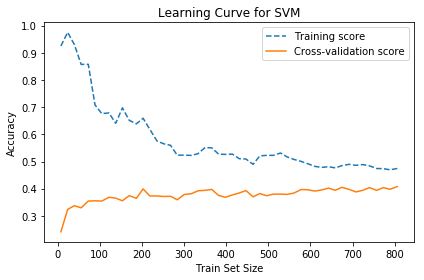

In [113]:
py.title("Learning Curve for SVM")
py.xlabel("Train Set Size"), py.ylabel("Accuracy"), py.legend(loc="best")
py.tight_layout()
py.show()

### Gradient Boosting Classifier

In [114]:
train_sizes, train_scores, test_scores = learning_curve(tuned,X, Y.astype(int),cv=5,scoring='accuracy',train_sizes=linspace(0.01, 1.0, 50))

In [115]:
train_mean = mean(train_scores, axis=1)
train_std = std(train_scores, axis=1)

In [116]:
test_mean = mean(test_scores, axis=1)
test_std = std(test_scores, axis=1)

In [117]:
py.plot(train_sizes, train_mean, '--',  label="Training score")
py.plot(train_sizes, test_mean, label="Cross-validation score")

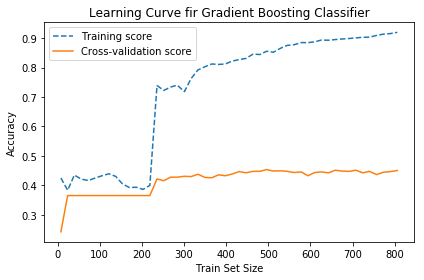

In [118]:
py.title("Learning Curve fir Gradient Boosting Classifier")
py.xlabel("Train Set Size"), py.ylabel("Accuracy"), py.legend(loc="best")
py.tight_layout()
py.show()